In [ ]:
!pip install git+https://github.com/huggingface/diffusers
!pip install transformers accelerate safetensors

  Cloning https://github.com/huggingface/diffusers to /tmp/pip-req-build-do_vmrcz
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers /tmp/pip-req-build-do_vmrcz
  Resolved https://github.com/huggingface/diffusers to commit 2a1d2f62180aa01637b4c1d98e36c7570fd06b1f
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.31.0.dev0-py3-none-any.whl size=2845267 sha256=9b026cedbac64d29d45c71cccad057b1869e239c23c5d6bba0c893e5d7c8c941
  Stored in directory: /tmp/pip-ephem-wheel-cache-v434_714/wheels/f7/7d/99/d361489e5762e3464b3811bc629e94cf5bf5ef44dd5c3c4d52
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.30.3
    Uninstalling diffusers-0.30.3:
      Successfully uninstalled diffusers-0.30.3


In [ ]:
from diffusers import StableDiffusionXLPipeline
import torch
from transformers.pipelines.image_to_text import Image
from IPython.display import display

In [ ]:
pipe=StableDiffusionXLPipeline.from_pretrained("segmind/SSD-1B",
                                               torch_dtype=torch.float16,
                                               use_safetensors=True,
                                               variant='fp16')

model_index.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/474 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/2.66G [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.77k [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/602 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

loading configuration file /root/.cache/huggingface/hub/models--segmind--SSD-1B/snapshots/60987f37e94cd59c36b1cba832b9f97b57395a10/text_encoder_2/config.json
Model config CLIPTextConfig {
  "architectures": [
    "CLIPTextModelWithProjection"
  ],
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "dropout": 0.0,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_size": 1280,
  "initializer_factor": 1.0,
  "initializer_range": 0.02,
  "intermediate_size": 5120,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 77,
  "model_type": "clip_text_model",
  "num_attention_heads": 20,
  "num_hidden_layers": 32,
  "pad_token_id": 1,
  "projection_dim": 1280,
  "torch_dtype": "float32",
  "transformers_version": "4.44.2",
  "vocab_size": 49408
}

loading weights file /root/.cache/huggingface/hub/models--segmind--SSD-1B/snapshots/60987f37e94cd59c36b1cba832b9f97b57395a10/text_encoder_2/model.fp16.safetensors
Instantiating CLIPTextModelWithProjection model under default dtype torch.float1

In [ ]:
pipe.to("cuda")

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.31.0.dev0",
  "_name_or_path": "segmind/SSD-1B",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [ ]:
prompt="An astronaut riding a purple horse"
neg_prompt="ugly , blurry , poor quality"

In [ ]:
image=pipe(prompt=prompt ,
           negative_prompt =neg_prompt).image[0]

  0%|          | 0/50 [00:00<?, ?it/s]

AttributeError: 'StableDiffusionXLPipelineOutput' object has no attribute 'image'

In [ ]:
image=pipe(prompt=prompt ,
           negative_prompt =neg_prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

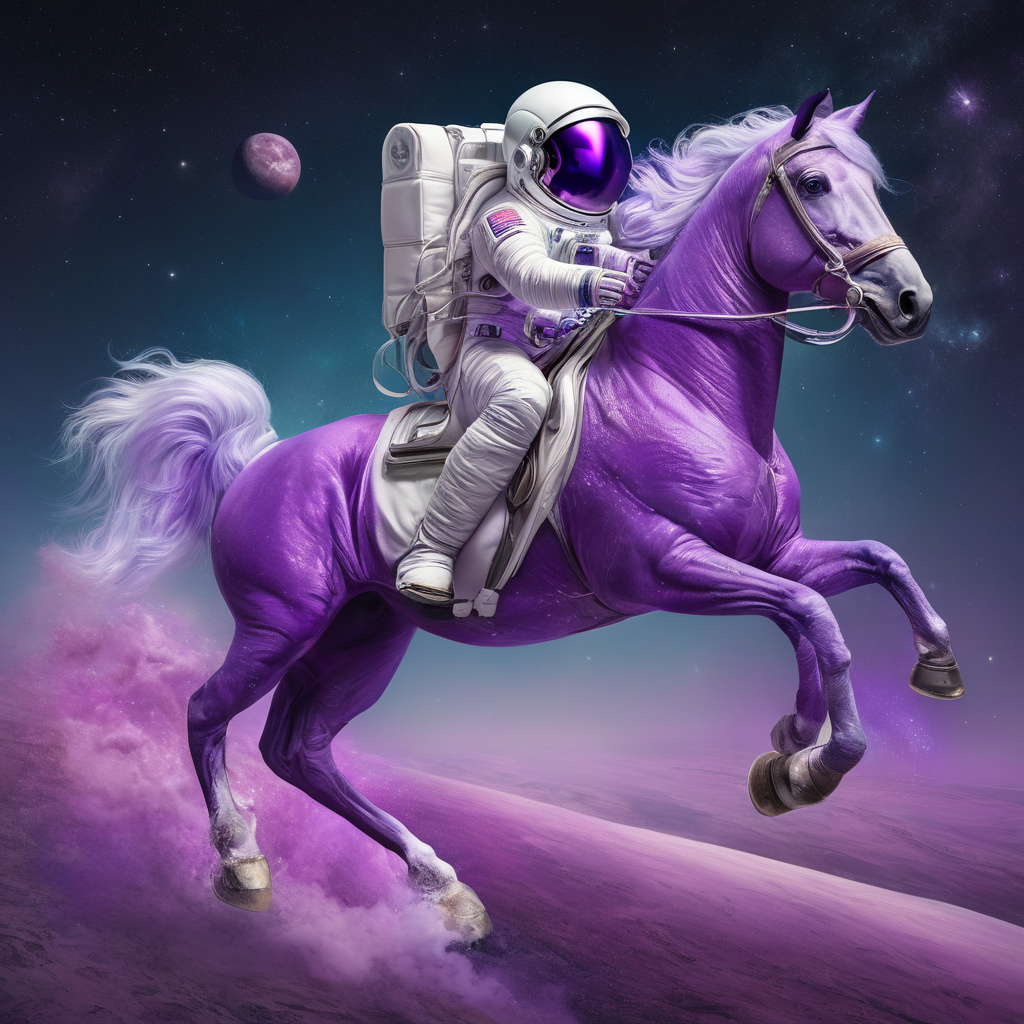

In [ ]:
display(image)